Import

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
import warnings

warnings.filterwarnings(action='ignore')

In [4]:
FILE_PATH = '../data/predictive_maintenance.csv'

Read data

In [5]:
df = pd.read_csv(FILE_PATH, index_col='UDI')
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.drop(columns=['Product ID'], inplace=True)

In [7]:
df['Difference temperature [K]'] = df['Process temperature [K]'] - df['Air temperature [K]']

In [8]:
df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Type                        10000 non-null  object 
 1   Air temperature [K]         10000 non-null  float64
 2   Process temperature [K]     10000 non-null  float64
 3   Rotational speed [rpm]      10000 non-null  int64  
 4   Torque [Nm]                 10000 non-null  float64
 5   Tool wear [min]             10000 non-null  int64  
 6   Target                      10000 non-null  int64  
 7   Failure Type                10000 non-null  object 
 8   Difference temperature [K]  10000 non-null  float64
 9   Power                       10000 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 859.4+ KB


In [10]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Difference temperature [K],Power
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,10.000630,59967.147040
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094,10193.093881
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,7.600000,10966.800000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,9.300000,53105.400000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,9.800000,59883.900000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,11.000000,66873.750000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,12.100000,99980.400000


In [11]:
df.isna().sum()

Type                          0
Air temperature [K]           0
Process temperature [K]       0
Rotational speed [rpm]        0
Torque [Nm]                   0
Tool wear [min]               0
Target                        0
Failure Type                  0
Difference temperature [K]    0
Power                         0
dtype: int64

In [12]:
df.duplicated().sum()

0

0    9661
1     339
Name: Target, dtype: int64

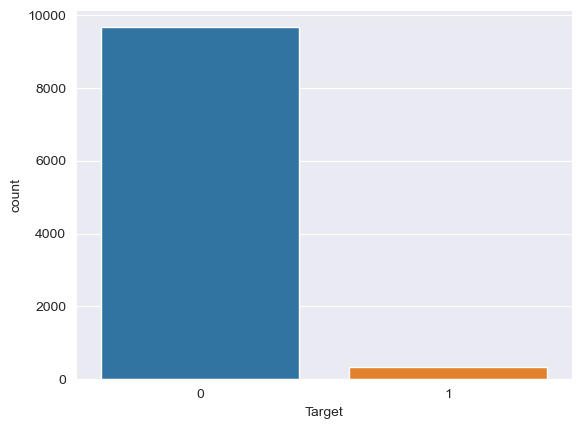

In [13]:
sns.countplot(x='Target', data=df)
df['Target'].value_counts()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Power Failure'),
  Text(1, 0, 'Tool Wear Failure'),
  Text(2, 0, 'Overstrain Failure'),
  Text(3, 0, 'No Failure'),
  Text(4, 0, 'Heat Dissipation Failure')])

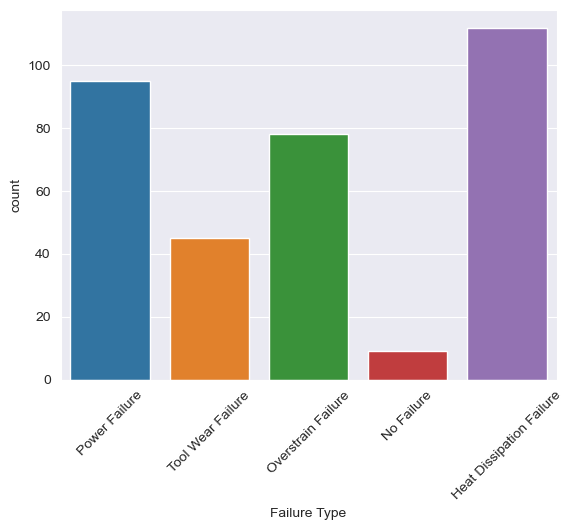

In [14]:
sns.countplot(x='Failure Type', data=df[df['Target']==1])
df['Failure Type'].value_counts()
plt.xticks(rotation=45)

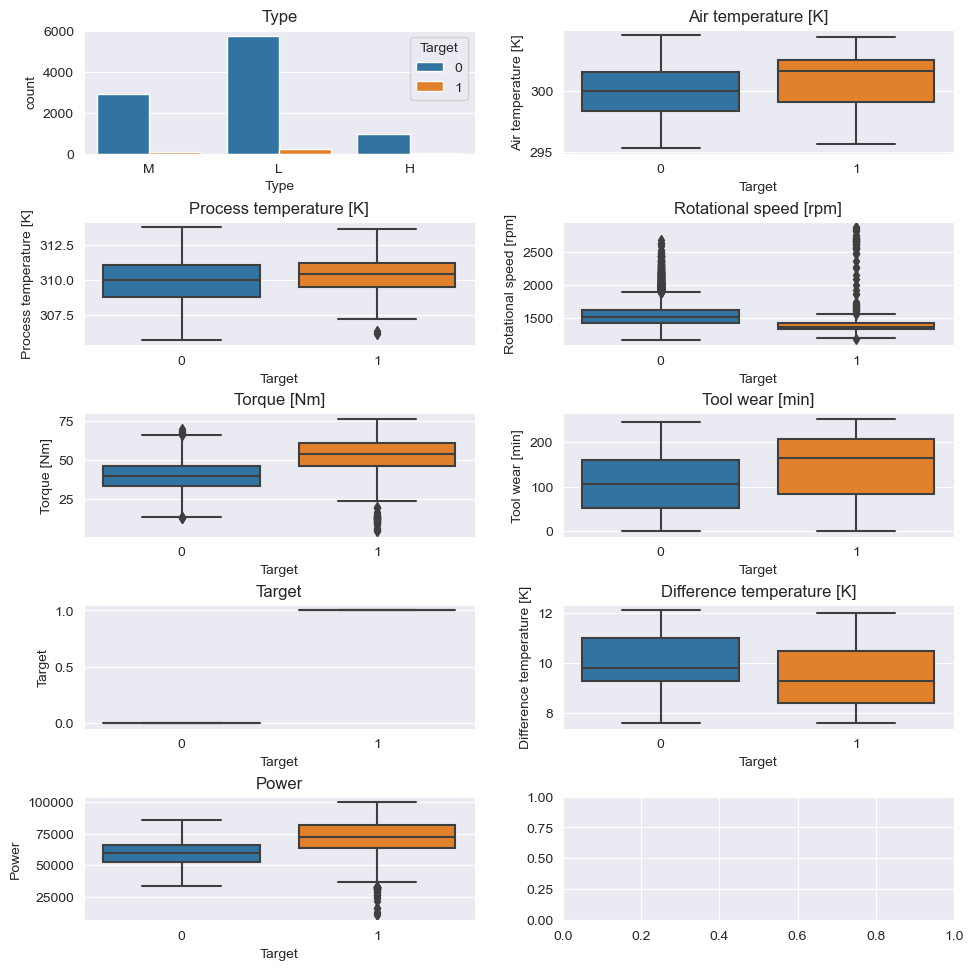

In [15]:
def visualize_box(_df, target, nb_col=2):
    columns = _df.columns
    nb_row = math.ceil(len(columns)/nb_col )

    fig, axes = plt.subplots(nb_row, nb_col, figsize=(10, 10))
    fig.tight_layout(pad=3.0)
    
    for i, col_name in enumerate(columns):
        row, col = i // nb_col, i % nb_col
        ax = axes[row, col]
        ax.set_title(f'{col_name}')
        if _df[col_name].dtype == 'object':
            sns.countplot(data=_df, x=col_name, hue=target, ax=ax)
        else:
            sns.boxplot(data=_df, x=target, y=col_name, ax=ax)
            
    plt.show()   
        
visualize_box(df.drop(columns=[ 'Failure Type']),'Target', 2)

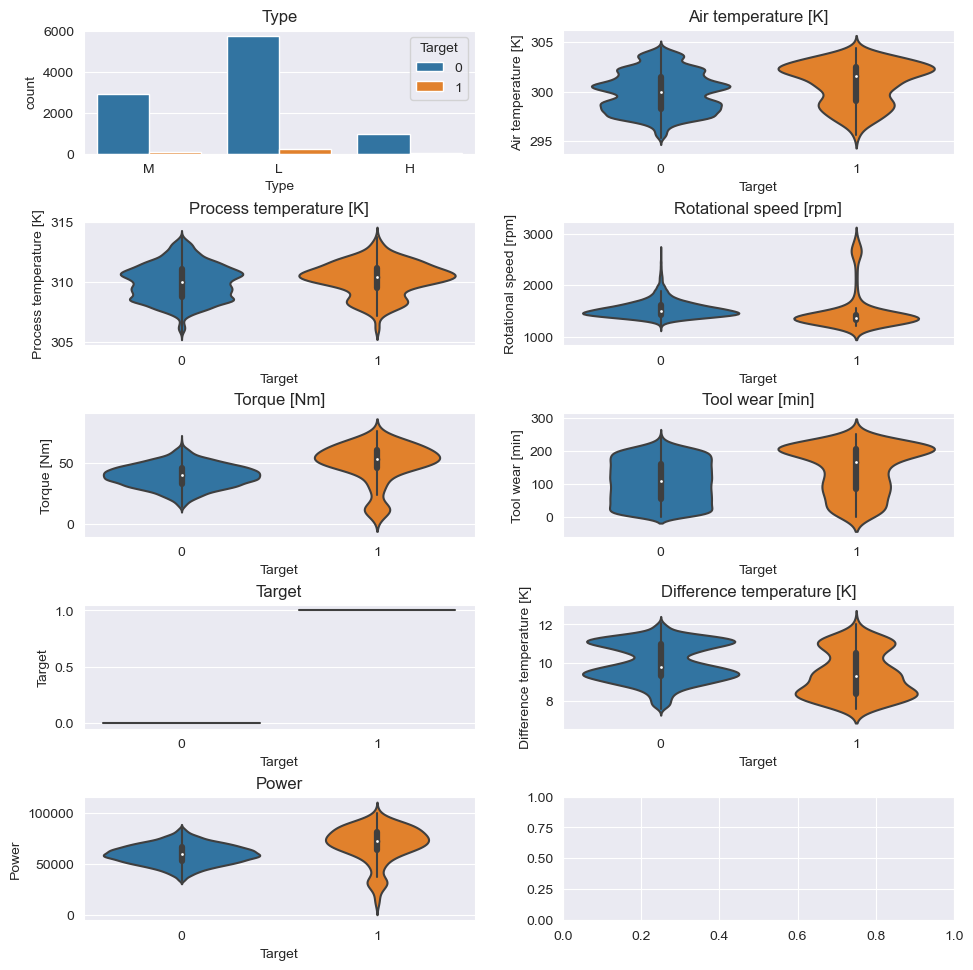

In [16]:
def visualize_violon(_df, target, nb_col=2):
    columns = _df.columns
    nb_row = math.ceil(len(columns)/nb_col )

    fig, axes = plt.subplots(nb_row, nb_col, figsize=(10, 10))
    fig.tight_layout(pad=3.0)

    for i, col_name in enumerate(columns):
        row, col = i // nb_col, i % nb_col
        ax = axes[row, col]
        ax.set_title(f'{col_name}')
        if _df[col_name].dtype == 'object':
            sns.countplot(data=_df, x=col_name, hue=target, ax=ax)
        else:
            sns.violinplot(data=_df, x=target, y=col_name, ax=ax)

    plt.show()

visualize_violon(df.drop(columns=[ 'Failure Type']),'Target', 2)

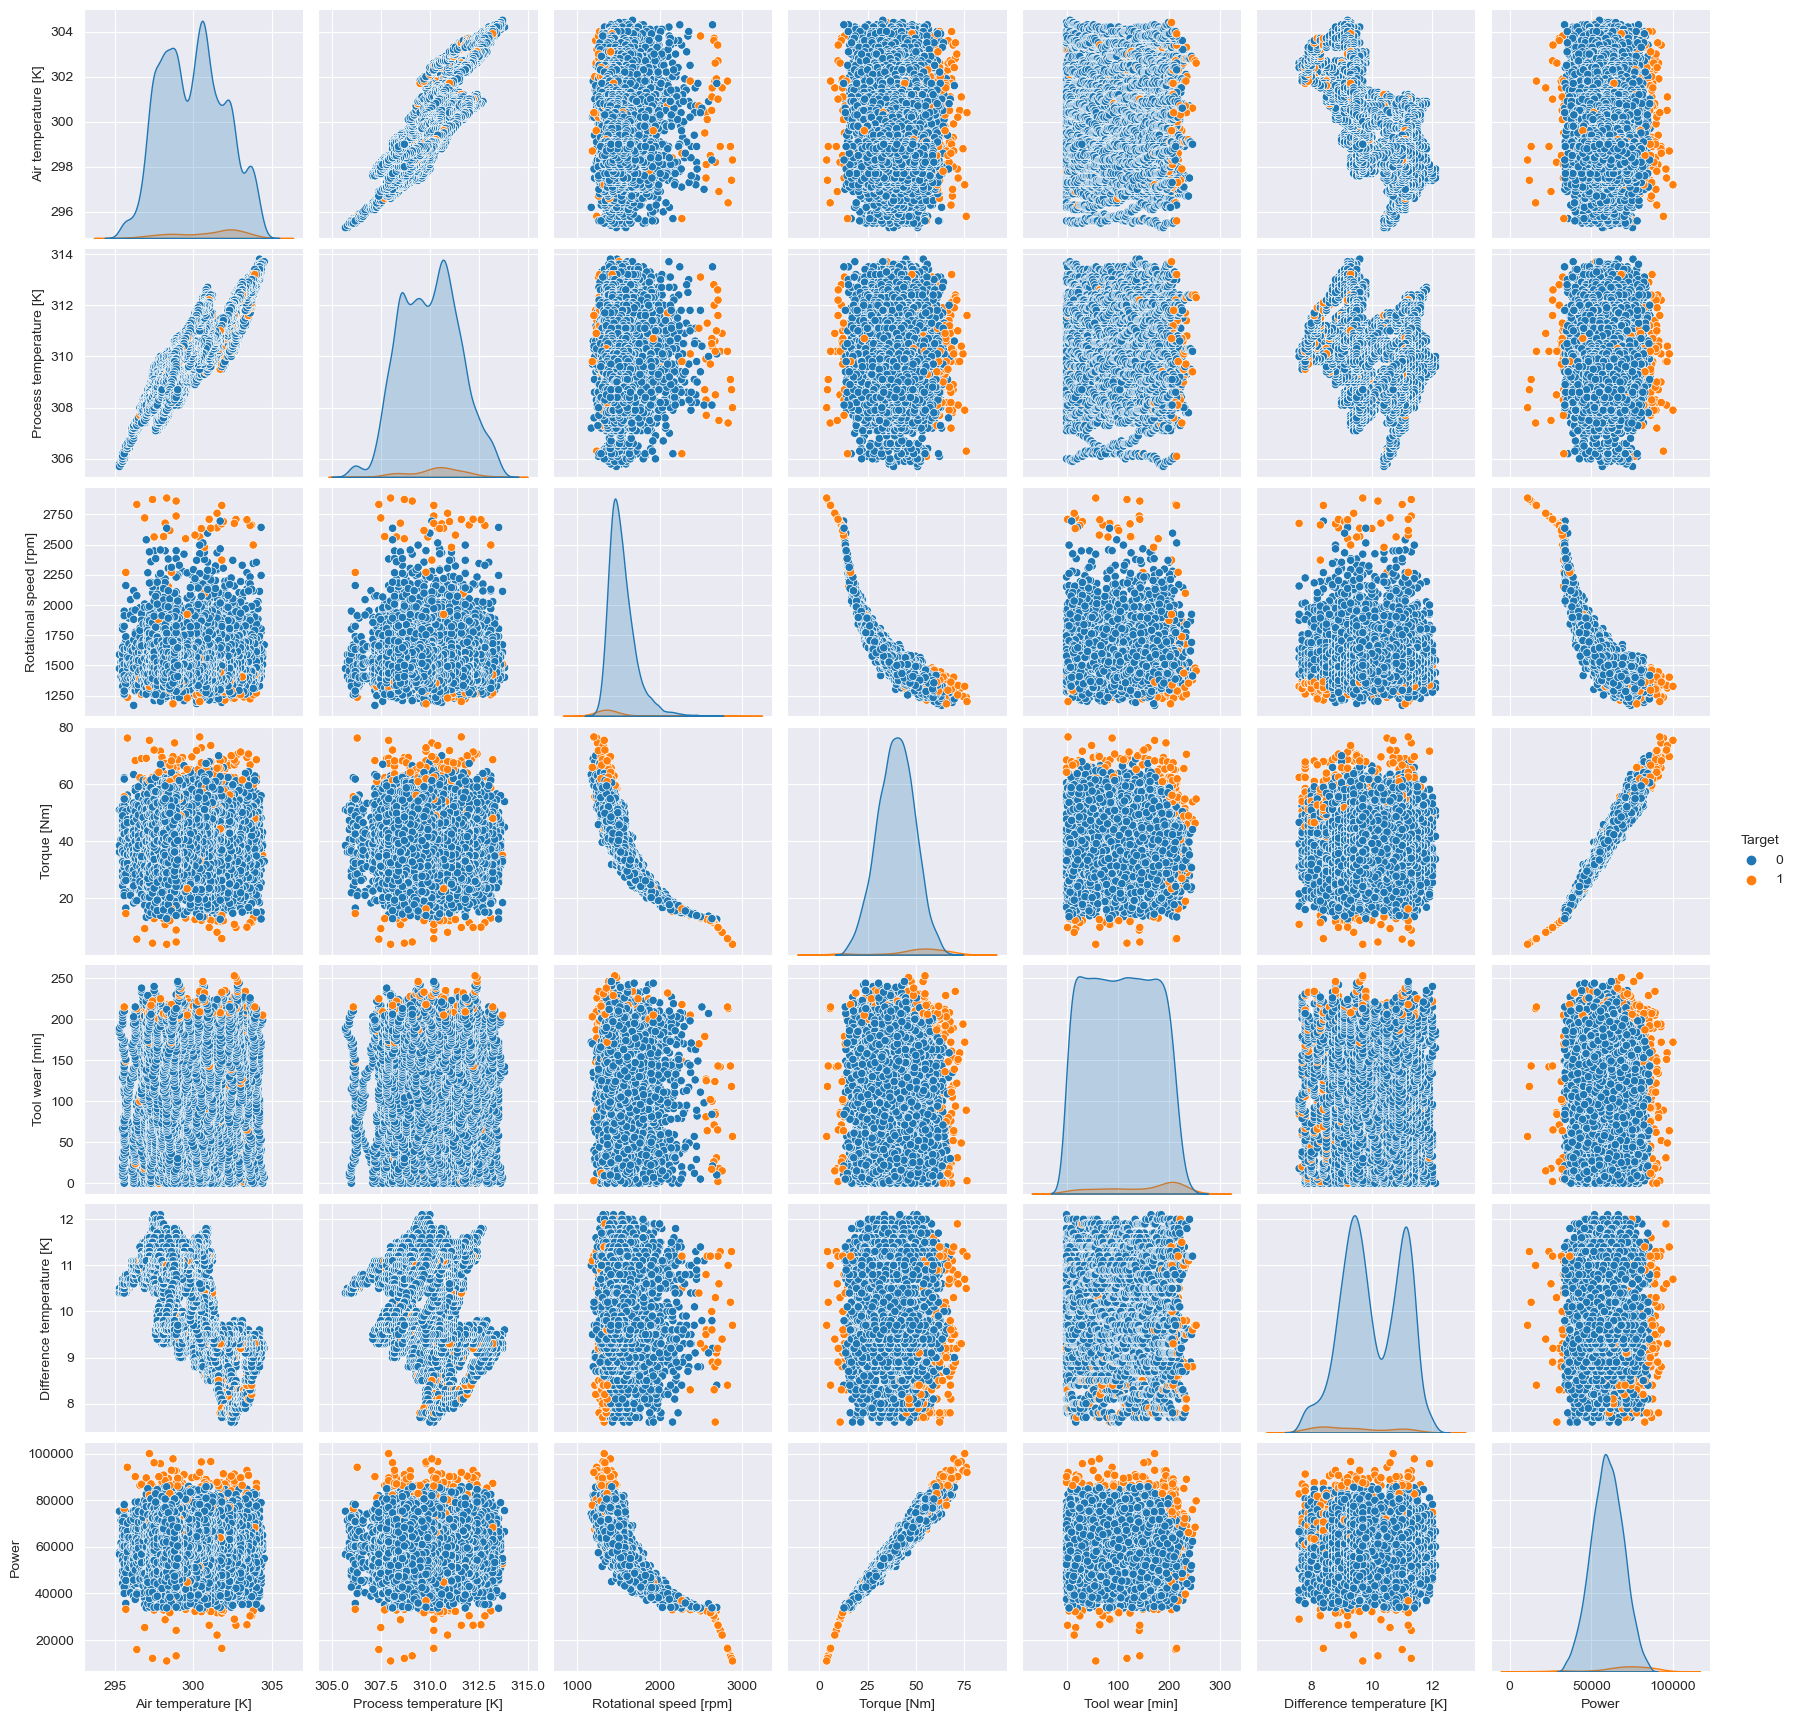

In [17]:
sns.pairplot(df , hue = 'Target')

In [19]:
df.to_csv('../data/predictive_maintenance_A.csv')